In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

df = pd.read_csv('fatal-police-shootings-data.csv')
race_pivot = df.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc='size', fill_value=0)
print(race_pivot)

signs_of_mental_illness  False  True 
race                                 
A                           69     24
B                         1114    184
H                          745    157
N                           64     14
O                           37     11
W                         1763    713


In [3]:
race_pivot['percent_mental_illness'] = race_pivot.apply(lambda row: row[True] / (row[True] + row[False]) * 100, axis=1)
print(race_pivot)

signs_of_mental_illness  False  True  percent_mental_illness
race                                                        
A                           69    24               25.806452
B                         1114   184               14.175655
H                          745   157               17.405765
N                           64    14               17.948718
O                           37    11               22.916667
W                         1763   713               28.796446


In [4]:
max_race = race_pivot['percent_mental_illness'].idxmax()
max_value = race_pivot['percent_mental_illness'].max()
print(f'Największy odsetek: {max_race} ({max_value:.2f}%)')

Największy odsetek: W (28.80%)


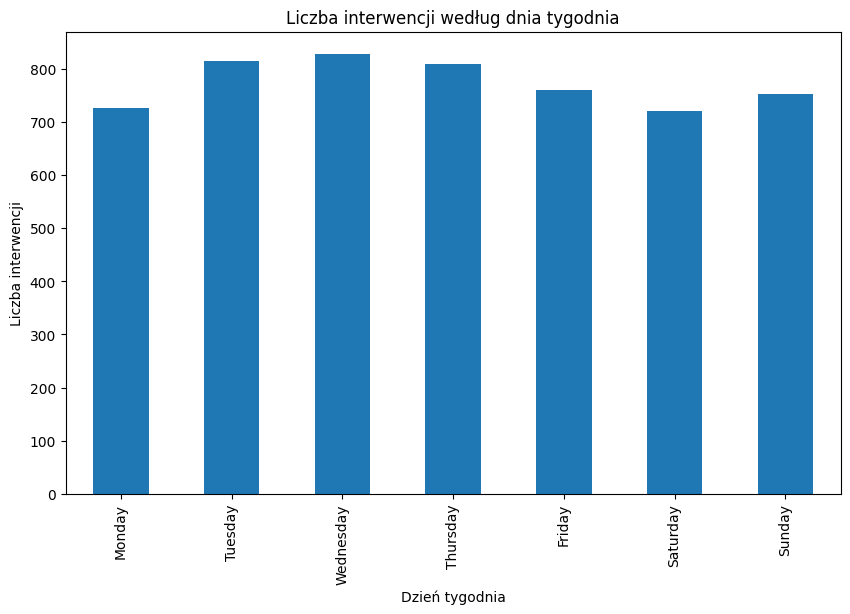

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=order, ordered=True)
weekday_counts = df.pivot_table(index='weekday', aggfunc='size', observed=False)

plt.figure(figsize=(10,6))
weekday_counts.plot(kind='bar')
plt.title('Liczba interwencji według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.show()

In [29]:
from IPython.display import display
headers = {'User-Agent': 'MyUniversityProject/1.0 (myemail@example.com)'}
html_population = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
html_abbr = 'https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations'

response_population = requests.get(html_population, headers=headers)
response_abbr = requests.get(html_abbr, headers=headers)

population_tables = pd.read_html(StringIO(response_population.text))
abbr_tables = pd.read_html(StringIO(response_abbr.text))

population_df = population_tables[0]
population_col = 'Census population, April 1, 2020 [1][2]'

population_df = population_df[['State', population_col]]
population_df.columns = ['state', 'population']

abbr_df = abbr_tables[1]
abbr_df.columns = abbr_df.columns.get_level_values(0)
abbr_df = abbr_df[['Name', 'USPS (& ANSI)']]
abbr_df.columns = ['state', 'abbr']

population_df = population_df[population_df['state'].isin(abbr_df['state'])]
states_df = population_df.merge(abbr_df, on='state', how='inner')

state_counts = df.groupby('state').size().reset_index(name='number_of_incidents')
merged_df = state_counts.merge(states_df, left_on='state', right_on='abbr', how='left', suffixes=('_abbr', '_name'))
merged_df['incidents_per_1000'] = merged_df['number_of_incidents'] / merged_df['population'] * 1000

print('Incidents per 1000 citizens')
display(merged_df)

Incidents per 1000 citizens


,state_abbr,number_of_incidents,state_name,population,abbr,incidents_per_1000
0,AK,39,Alaska,733391,AK,0.053178
1,AL,104,Alabama,5024279,AL,0.020699
2,AR,83,Arkansas,3011524,AR,0.027561
3,AZ,254,Arizona,7151502,AZ,0.035517
4,CA,799,California,39538223,CA,0.020208
5,CO,195,Colorado,5773714,CO,0.033774
6,CT,21,Connecticut,3605944,CT,0.005824
7,DC,13,District of Columbia,689545,DC,0.018853
8,DE,13,Delaware,989948,DE,0.013132
9,FL,350,Florida,21538187,FL,0.016250
